In [468]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [469]:
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report,auc,roc_curve
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from mlxtend.feature_selection import exhaustive_feature_selector,SequentialFeatureSelector
from sklearn.model_selection import train_test_split,cross_val_score

In [470]:
pd.pandas.set_option('display.max_columns',None)

In [471]:
data= pd.read_csv('adult.csv')

In [472]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [473]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [474]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [475]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [476]:
round(data.describe(),1)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.0,32561.0,32561.0,32561.0,32561.0,32561.0
mean,38.6,189778.4,10.1,1077.6,87.3,40.4
std,13.6,105550.0,2.6,7385.3,403.0,12.3
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117827.0,9.0,0.0,0.0,40.0
50%,37.0,178356.0,10.0,0.0,0.0,40.0
75%,48.0,237051.0,12.0,0.0,0.0,45.0
max,90.0,1484705.0,16.0,99999.0,4356.0,99.0


In [477]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

## Data Preprocessing.

In [478]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [479]:
d = {'<=50K':0,'>50K':1}
data['income']=data['income'].map(d)

In [480]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [481]:
print('Private :-',data[data['workclass']=='Private']['income'].mean())
print('Self-emp-not-inc :-',data[data['workclass']=='Self-emp-not-inc']['income'].mean())
print('Local-gov :-',data[data['workclass']=='Local-gov']['income'].mean())
print('? :-',data[data['workclass']=='?']['income'].mean())
print('State-gov :-',data[data['workclass']=='State-gov']['income'].mean())
print('Self-emp-inc :-',data[data['workclass']=='Self-emp-inc']['income'].mean())
print('Federal-gov :-',data[data['workclass']=='Federal-gov']['income'].mean())
print('Never-worked :-',data[data['workclass']=='Never-worked']['income'].mean())
print('Without-pay :-',data[data['workclass']=='Without-pay']['income'].mean())

Private :- 0.21867289390200917
Self-emp-not-inc :- 0.2849271940181031
Local-gov :- 0.29479216435738176
? :- 0.10403050108932461
State-gov :- 0.27195685670261943
Self-emp-inc :- 0.557347670250896
Federal-gov :- 0.38645833333333335
Never-worked :- 0.0
Without-pay :- 0.0


In [484]:
array=np.array([data[data['workclass']=='Private']['income'].mean(),data[data['workclass']=='Self-emp-not-inc']['income'].mean(),data[data['workclass']=='Local-gov']['income'].mean(),data[data['workclass']=='?']['income'].mean(),data[data['workclass']=='State-gov']['income'].mean(),data[data['workclass']=='Self-emp-inc']['income'].mean(),data[data['workclass']=='Federal-gov']['income'].mean(),data[data['workclass']=='Never-worked']['income'].mean(),data[data['workclass']=='Without-pay']['income'].mean()])

In [485]:
array.argsort()

array([7, 8, 3, 0, 4, 1, 2, 6, 5], dtype=int32)

In [486]:
di = {'Private':3,'Self-emp-not-inc':5,'Local-gov':6,'?':2,'State-gov':4,'Self-emp-inc':8,'Federal-gov':7,'Never-worked':0,'Without-pay':1}

In [487]:
data['workclass']=data['workclass'].map(di)

In [488]:
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [489]:
edu ={'Preschool':0,'1st-4th':1,'5th-6th':2,'7th-8th':3,'9th':4,'10th':5,'11th':6,'12th':7,'HS-grad':8,'Some-college':9,'Assoc-voc':10,'Assoc-acdm':12,'Prof-school':13,'Bachelors':14,'Masters':15,'Doctorate':16}

In [490]:
data['education']=data['education'].map(edu)

In [491]:
data['education'].value_counts()

8     10501
9      7291
14     5355
15     1723
10     1382
6      1175
12     1067
5       933
3       646
13      576
4       514
7       433
16      413
2       333
1       168
0        51
Name: education, dtype: int64

In [492]:
data['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [493]:
print('Married-civ-spouse :-',data[data['marital.status']=='Married-civ-spouse']['income'].mean())
print('Never-married :-',data[data['marital.status']=='Never-married']['income'].mean())
print('Divorced :-',data[data['marital.status']=='Divorced']['income'].mean())
print('Separated:-',data[data['marital.status']=='Separated']['income'].mean())
print('Widowed :-',data[data['marital.status']=='Widowed']['income'].mean())
print('Married-spouse-absent :-',data[data['marital.status']=='Married-spouse-absent']['income'].mean())
print('Married-AF-spouse :-',data[data['marital.status']=='Married-AF-spouse']['income'].mean())

Married-civ-spouse :- 0.4468482905982906
Never-married :- 0.04596087241411589
Divorced :- 0.10420886788206167
Separated:- 0.06439024390243903
Widowed :- 0.08559919436052367
Married-spouse-absent :- 0.08133971291866028
Married-AF-spouse :- 0.43478260869565216


In [494]:
x = {'Widowed':0,'Never-married':1,'Married-spouse-absent':3,'Separated':2,'Divorced':4,'Married-civ-spouse':5,'Married-AF-spouse':6}

In [495]:
data['marital.status']=data['marital.status'].map(x)

In [496]:
data['marital.status'].value_counts()

5    14976
1    10683
4     4443
2     1025
0      993
3      418
6       23
Name: marital.status, dtype: int64

In [497]:
data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [498]:
print('Prof-specialty:-',data[data['occupation']=='Prof-specialty']['income'].mean())
print('Craft-repair :-',data[data['occupation']=='Craft-repair']['income'].mean())
print('Exec-managerial :-',data[data['occupation']=='Exec-managerial']['income'].mean())
print('Adm-clerical :-',data[data['occupation']=='Adm-clerical']['income'].mean())
print('Sales :-',data[data['occupation']=='Sales']['income'].mean())
print('Other-service  :-',data[data['occupation']=='Other-service']['income'].mean())
print('Machine-op-inspct :-',data[data['occupation']=='Machine-op-inspct']['income'].mean())
print('? :-',data[data['occupation']=='?']['income'].mean())
print('Transport-moving :-',data[data['occupation']=='Transport-moving']['income'].mean())
print('Handlers-cleaners :-',data[data['occupation']=='Handlers-cleaners']['income'].mean())
print('Farming-fishing :-',data[data['occupation']=='Farming-fishing']['income'].mean())
print('Tech-support:-',data[data['occupation']=='Tech-support']['income'].mean())
print('Protective-serv :-',data[data['occupation']=='Protective-serv']['income'].mean())
print('Priv-house-serv :-',data[data['occupation']=='Priv-house-serv']['income'].mean())
print('Armed-Forces:-',data[data['occupation']=='Armed-Forces']['income'].mean())

Prof-specialty:- 0.44903381642512075
Craft-repair :- 0.22664064405952672
Exec-managerial :- 0.4840137727496311
Adm-clerical :- 0.13448275862068965
Sales :- 0.2693150684931507
Other-service  :- 0.04157814871016692
Machine-op-inspct :- 0.12487512487512488
? :- 0.10363537710255019
Transport-moving :- 0.20037570444583594
Handlers-cleaners :- 0.06277372262773723
Farming-fishing :- 0.11569416498993963
Tech-support:- 0.30495689655172414
Protective-serv :- 0.325115562403698
Priv-house-serv :- 0.006711409395973154
Armed-Forces:- 0.1111111111111111


In [499]:
array1=np.array([data[data['occupation']=='Prof-specialty']['income'].mean(),data[data['occupation']=='Craft-repair']['income'].mean(),data[data['occupation']=='Exec-managerial']['income'].mean(),data[data['occupation']=='Adm-clerical']['income'].mean(),data[data['occupation']=='Sales']['income'].mean(),data[data['occupation']=='Other-service']['income'].mean(),data[data['occupation']=='Machine-op-inspct']['income'].mean(),data[data['occupation']=='?']['income'].mean(),data[data['occupation']=='Transport-moving']['income'].mean(),data[data['occupation']=='Handlers-cleaners']['income'].mean(),data[data['occupation']=='Farming-fishing']['income'].mean(),data[data['occupation']=='Tech-support']['income'].mean(),data[data['occupation']=='Protective-serv']['income'].mean(),data[data['occupation']=='Priv-house-serv']['income'].mean(),data[data['occupation']=='Armed-Forces']['income'].mean()])

In [500]:
array1.argsort()

array([13,  5,  9,  7, 14, 10,  6,  3,  8,  1,  4, 11, 12,  0,  2],
      dtype=int32)

In [501]:
z ={'Prof-specialty':13,'Craft-repair':9,'Exec-managerial':14,'Adm-clerical':7,'Sales':10,'Other-service':1,'Machine-op-inspct':6,'?':3,'Transport-moving':8,'Handlers-cleaners':2,'Farming-fishing':5,'Tech-support':11,'Protective-serv':12,'Priv-house-serv':0,'Armed-Forces':4}

In [502]:
data['occupation']=data['occupation'].map(z)

In [503]:
data['occupation'].value_counts()

13    4140
9     4099
14    4066
7     3770
10    3650
1     3295
6     2002
3     1843
8     1597
2     1370
5      994
11     928
12     649
0      149
4        9
Name: occupation, dtype: int64

In [504]:
data['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [505]:
print('Husband:-',data[data['relationship']=='Husband']['income'].mean())
print('Not-in-family :-',data[data['relationship']=='Not-in-family']['income'].mean())
print('Own-child :-',data[data['relationship']=='Own-child']['income'].mean())
print('Unmarried :-',data[data['relationship']=='Unmarried']['income'].mean())
print('Wife :-',data[data['relationship']=='Wife']['income'].mean())
print('Other-relative  :-',data[data['relationship']=='Other-relative']['income'].mean())

Husband:- 0.448571212006367
Not-in-family :- 0.10307043949428056
Own-child :- 0.013220205209155485
Unmarried :- 0.0632617527568195
Wife :- 0.47512755102040816
Other-relative  :- 0.03771661569826707


In [506]:
array3 = np.array([data[data['relationship']=='Husband']['income'].mean(),data[data['relationship']=='Not-in-family']['income'].mean(),data[data['relationship']=='Own-child']['income'].mean(),data[data['relationship']=='Unmarried']['income'].mean(),data[data['relationship']=='Wife']['income'].mean(),data[data['relationship']=='Other-relative']['income'].mean()])

In [507]:
array3.argsort()

array([2, 5, 3, 1, 0, 4], dtype=int32)

In [508]:
a ={'Own-child':0,'Other-relative':1,'Unmarried':2,'Not-in-family':3,'Husband':4,'Wife':5}

In [509]:
data['relationship']=data['relationship'].map(a)

In [510]:
data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [511]:
print('White:-',data[data['race']=='White']['income'].mean())
print('Black :-',data[data['race']=='Black']['income'].mean())
print('Asian-Pac-Islander :-',data[data['race']=='Asian-Pac-Islander']['income'].mean())
print('Amer-Indian-Eskimo:-',data[data['race']=='Amer-Indian-Eskimo']['income'].mean())
print('Other:-',data[data['race']=='Other']['income'].mean())

White:- 0.2558599367270636
Black :- 0.12387964148527529
Asian-Pac-Islander :- 0.26564003849855633
Amer-Indian-Eskimo:- 0.1157556270096463
Other:- 0.09225092250922509


In [512]:
array4 = np.array([data[data['race']=='White']['income'].mean(),data[data['race']=='Black']['income'].mean(),data[data['race']=='Asian-Pac-Islander']['income'].mean(),data[data['race']=='Amer-Indian-Eskimo']['income'].mean(),data[data['race']=='Other']['income'].mean()])

In [513]:
array4.argsort()

array([4, 3, 1, 0, 2], dtype=int32)

In [514]:
q = {'Other':0,'Amer-Indian-Eskimo':1,'Black':2,'White':3,'Asian-Pac-Islander':4}

In [515]:
data['race']=data['race'].map(q)

In [516]:
data['race'].value_counts()

3    27816
2     3124
4     1039
1      311
0      271
Name: race, dtype: int64

In [517]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [518]:
r = {'Male':0,'Female':1}

In [519]:
data['sex']=data['sex'].map(r)

In [520]:
data['sex'].value_counts()

0    21790
1    10771
Name: sex, dtype: int64

In [521]:
label = LabelEncoder()
data['native.country']=label.fit_transform(data['native.country'])

In [522]:
data['native.country'].value_counts()

39    29170
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
12       29
10       29
7        28
21       24
17       20
1        19
38       19
37       18
25       18
41       16
28       14
18       13
16       13
34       12
15        1
Name: native.country, dtype: int64

In [523]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,2,77053,8,9,0,3,3,3,1,0,4356,40,39,0
1,82,3,132870,8,9,0,14,3,3,1,0,4356,18,39,0
2,66,2,186061,9,10,0,3,2,2,1,0,4356,40,39,0
3,54,3,140359,3,4,4,6,2,3,1,0,3900,40,39,0
4,41,3,264663,9,10,2,13,0,3,1,0,3900,40,39,0


## StandardScaling.

In [524]:
x = data.drop(columns=['income'])
y = data['income']

In [525]:
x.shape,y.shape

((32561, 14), (32561,))

In [526]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y,train_size=42)

In [527]:
x_train.shape,x_test.shape

((42, 14), (32519, 14))

In [528]:
scaler = StandardScaler()
x_train_scalled = scaler.fit_transform(x_train)
x_test_scalled  = scaler.transform(x_test)

In [529]:
X_train=pd.DataFrame(x_train_scalled,columns=x_train.columns)
X_test =pd.DataFrame(x_test_scalled,columns=x_test.columns)

### Imbalalance To Balance

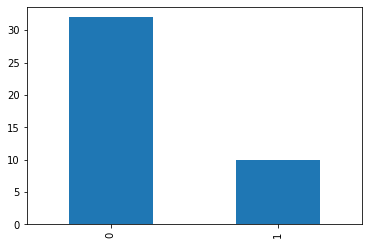

In [530]:
y_train.value_counts().plot(kind='bar')
plt.show()

In [531]:
y_train.value_counts()

0    32
1    10
Name: income, dtype: int64

In [532]:
from imblearn.over_sampling import SMOTE

In [533]:
sm = SMOTE(sampling_strategy=1,random_state=42,k_neighbors=5)

In [534]:
x_train_res,y_train_res = sm.fit_sample(X_train,y_train)

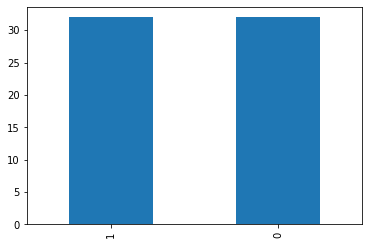

In [535]:
y_train_res.value_counts().plot(kind='bar')
plt.show()

In [536]:
y_train_res.value_counts()

1    32
0    32
Name: income, dtype: int64

## Feature Engineering.

### Foreward Step Features Selection Technique.

In [537]:
classifier = RandomForestClassifier()

In [538]:
self = SequentialFeatureSelector( RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42),k_features=7,forward=True,scoring='accuracy',cv=5,floating=False)

In [539]:
self.fit(x_train_res,y_train_res)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [540]:
self.k_features

7

In [541]:
self.k_feature_names_

('workclass',
 'marital.status',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country')

In [542]:
self.k_score_

0.9217948717948719

In [543]:
pd.DataFrame(self.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.9230769230769231, 0.6923076923076923, 0.923...",0.858974,"(marital.status,)",0.116051,0.0902914,0.0451457
2,"(5, 13)","[0.9230769230769231, 0.6923076923076923, 1.0, ...",0.90641,"(marital.status, native.country)",0.145119,0.112908,0.0564539
3,"(5, 12, 13)","[0.9230769230769231, 0.7692307692307693, 1.0, ...",0.921795,"(marital.status, hours.per.week, native.country)",0.108355,0.084304,0.042152
4,"(5, 10, 12, 13)","[0.8461538461538461, 0.7692307692307693, 1.0, ...",0.90641,"(marital.status, capital.gain, hours.per.week,...",0.115064,0.0895235,0.0447618
5,"(1, 5, 10, 12, 13)","[0.9230769230769231, 0.7692307692307693, 1.0, ...",0.921795,"(workclass, marital.status, capital.gain, hour...",0.108355,0.084304,0.042152
6,"(1, 5, 9, 10, 12, 13)","[0.9230769230769231, 0.8461538461538461, 1.0, ...",0.953846,"(workclass, marital.status, sex, capital.gain,...",0.0790948,0.0615385,0.0307692
7,"(1, 5, 9, 10, 11, 12, 13)","[0.9230769230769231, 0.7692307692307693, 1.0, ...",0.921795,"(workclass, marital.status, sex, capital.gain,...",0.108355,0.084304,0.042152


In [544]:
X_train_self = self.transform(x_train_res)
X_test_self   = self.transform(X_test)

In [545]:
X_train_self = pd.DataFrame(X_train_self,columns=self.k_feature_names_)

In [546]:
X_test_self = pd.DataFrame(X_test_self,columns=self.k_feature_names_)

In [547]:
X_train_self.shape,X_test_self.shape

((64, 7), (32519, 7))

In [548]:
def RandomForest(x_train,x_test,y_train,y_test):
    clf =RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)
    clf.fit(x_train,y_train)
    y_predict = clf.predict(x_test)
    print('Accuracy :-',accuracy_score(y_test,y_predict))

In [549]:
RandomForest(X_train_self,X_test_self,y_train_res,y_test)

Accuracy :- 0.7729019957563271


### Backward Step Features Selection Techinique

In [550]:
selb = SequentialFeatureSelector( RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42),k_features=7,forward=False,scoring='accuracy',cv=5,floating=False)

In [551]:
selb.fit(x_train_res,y_train_res)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [552]:
selb.k_feature_names_

('fnlwgt',
 'education.num',
 'relationship',
 'race',
 'capital.gain',
 'capital.loss',
 'hours.per.week')

In [553]:
selb.k_features

7

In [554]:
selb.k_score_

0.9064102564102565

In [555]:
pd.DataFrame(selb.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)","[1.0, 0.6153846153846154, 0.9230769230769231, ...",0.857692,"(age, workclass, fnlwgt, education, education....",0.194999,0.151716,0.075858
13,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13)","[1.0, 0.6923076923076923, 0.9230769230769231, ...",0.889744,"(age, workclass, fnlwgt, education, education....",0.149434,0.116264,0.0581322
12,"(1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13)","[0.9230769230769231, 0.7692307692307693, 0.923...",0.90641,"(workclass, fnlwgt, education, education.num, ...",0.0965903,0.0751505,0.0375753
11,"(1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13)","[0.9230769230769231, 0.7692307692307693, 0.923...",0.90641,"(workclass, fnlwgt, education, education.num, ...",0.0965903,0.0751505,0.0375753
10,"(1, 2, 4, 7, 8, 9, 10, 11, 12, 13)","[0.9230769230769231, 0.7692307692307693, 0.923...",0.90641,"(workclass, fnlwgt, education.num, relationshi...",0.0965903,0.0751505,0.0375753
9,"(1, 2, 4, 7, 8, 10, 11, 12, 13)","[0.9230769230769231, 0.7692307692307693, 0.923...",0.90641,"(workclass, fnlwgt, education.num, relationshi...",0.0965903,0.0751505,0.0375753
8,"(1, 2, 4, 7, 8, 10, 11, 12)","[0.8461538461538461, 0.7692307692307693, 0.923...",0.891026,"(workclass, fnlwgt, education.num, relationshi...",0.100232,0.0779841,0.0389921
7,"(2, 4, 7, 8, 10, 11, 12)","[0.9230769230769231, 0.7692307692307693, 0.923...",0.90641,"(fnlwgt, education.num, relationship, race, ca...",0.0965903,0.0751505,0.0375753


In [556]:
X_train_selb = sel.transform(x_train_res)
X_test_selb  = sel.transform(X_test)

In [557]:
X_train_selb.shape,X_test_selb.shape

((64, 7), (32519, 7))

In [558]:
def RandomForest(x_train,x_test,y_train,y_test):
    clf =RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)
    clf.fit(x_train,y_train)
    y_predict = clf.predict(x_test)
    print('Accuracy :-',accuracy_score(y_test,y_predict))

In [559]:
%%time
RandomForest(X_train_selb,X_test_selb,y_train_res,y_test)

Accuracy :- 0.8061748516252037
Wall time: 768 ms
